In [231]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [232]:
dis_df = pd.DataFrame([
    [0,1,2,3,1,2,3,4],
    [1,0,1,2,2,1,2,3],
    [2,1,0,1,3,2,1,2],
    [3,2,1,0,4,3,2,1],
    [1,2,3,4,0,1,2,3],
    [2,1,2,3,1,0,1,2],
    [3,2,1,2,2,1,0,1],
    [4,3,2,1,3,2,1,0]],
    columns=['A','B','C','D','E','F','G','H'],
    index=['A','B','C','D','E','F','G','H'],
)
flow_df = pd.DataFrame([
    [0,5,2,4,1,0,0,6],
    [5,0,3,0,2,2,2,0],
    [2,3,0,0,0,0,0,5],
    [4,0,0,0,5,2,2,10],
    [1,2,0,5,0,10,0,0],
    [0,2,0,2,10,0,5,1],
    [0,2,0,2,0,5,0,10],
    [6,0,5,10,0,1,10,0]],
    columns=['A','B','C','D','E','F','G','H'],
    index=['A','B','C','D','E','F','G','H'],
)

In [233]:
# funcion de paso combinatoria
def step(sol):
    # genera indices a intercambiar
    i = np.random.randint(0, len(sol))
    j = np.random.randint(0, len(sol))
    # se asegura de no cambiar por si mismo
    while i == j:
        j = np.random.randint(0, len(sol))
    return i, j

def move(sol, i, j):
    # cambia valores
    sol[i], sol[j] = sol[j], sol[i]
    return sol

def calc_obj_fun(dis_df, flow_df, sol):
    new_dis_df = dis_df.reindex(columns=X0, index=X0)
    new_dis_arr = np.array(new_dis_df)
    obj_fun_df = pd.DataFrame(new_dis_arr*flow_df)
    obj_fun_arr = np.array(obj_fun_df)
    return sum(sum(obj_fun_arr))

objetivo original: 272

Final solution: ['B', 'A', 'E', 'G', 'C', 'D', 'H', 'F']
Minimized cost: 218


(1500, 0)

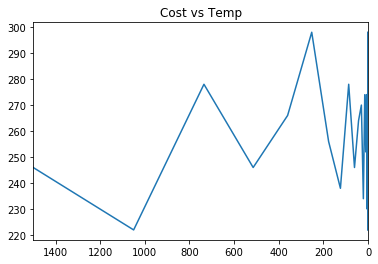

In [235]:
# parametros del algoritmo
Ti = 1500
T0 = Ti
M = 40
N = 20
alpha = 0.7
X0 = ['A','B','C','D','E','F','G','H']
np.random.shuffle(X0) # iniciamos en una solucion aleatoria
# valor objetivo original
of_act = calc_obj_fun(dis_df, flow_df, X0)
print(f'objetivo original: {sum_start}')

Temp = []
Min_cost = []
for i in range(M):
    for j in range(N):
        # genera siguiente movimiento
        next_step = step(X0)
        # calcula valor objetivo
        move(X0, *next_step) # mov temporal
        of_new = calc_obj_fun(dis_df, flow_df, X0)
        move(X0, *next_step) # regresa a step anterior
        # flip a coin to se if we move:
        will = 1/(np.exp(of_new-of_act)/T0)
        if of_new <= of_act:
            # movimiento chido, nos movemos
            move(X0, *next_step)
            of_act = of_new
        elif np.random.rand() <= will:
            # movimiento no tan chido, pero a ver que encontramos
            move(X0, *next_step)
            of_act = of_new
        else:
            pass # mov feo y no estamos dispuestos a explorar
    Temp.append(T0)
    Min_cost.append(of_new)
    T0 = alpha*T0
print()
print(f'Final solution: {X0}')
print(f'Minimized cost: {of_act}')

plt.plot(Temp, Min_cost)
plt.title('Cost vs Temp')
plt.xlim(Ti, 0)